# Ciencia de datos aplicada (ITBA): Modelo de segundo entregable

**Equipo:** Desiree Melisa Limachi, Felipe Mendiondo, German Lorenzani

**Nombre del proyecto**:
Sistema de pricing dinámico para ATUA

### 🧾 1. Importación y carga de librerías

('Reservas.csv', <http.client.HTTPMessage at 0x2dd3dffc1c0>)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
import math


### 🧾 2. Carga de datos

Con este código cargamos el archivo de reservas de Atua y limpiamos para enfocarnos solo en la información relevante para el análisis. Se eliminan varias columnas que no aportaban valor, como datos personales de los clientes, identificadores únicos y observaciones internas, porque por un lado no eran relevantes para nuestro analisis y por otro al ser algunos datos sensibles como la informacion de los clientes no parecio mejor, por seguridad, trabajar sin ellos.


In [ ]:
df = pd.read_csv('dataset/Reservas.csv', sep=';')

# Eliminamos columnas no necesarias
df_filtered = df.drop(columns=['Email', 'Dni', 'Telefono', 'uuid', 'Cliente', 'Proveedor de carro', 'Patente', 'Anifitrion', 'Celular', 'Iva', 'Observaciones', 'Pago Anfitrion', 'Condicion', 'id'])

df_filtered.head()

,Fecha de creacion,Estado,Ubicacion,Origen,Modelo,Nuevo Precio,Precio de la publicacion,Precio de la reserva,Gastos administrativo,Seguro base,...,Devolucion Aeropuerto,Precio final,Pago seña,Pendiente Por Cobrar,Check-in,Check-out,Dias de Alquiler,Pago de garantia,Monto de la garantia,Devolución Garantia
0,2022-09-14 15:56:05.325406,CANCELADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Sandero,ARS 49.000,ARS 7.633,ARS 22.900,ARS 1.145,ARS 5.200,...,ARS 0,ARS 29.485,ARS 0,ARS 0,16/9/22 0:00,19/9/22 0:00,3,NO,ARS 0,NO
1,2022-09-15 09:02:19.699192,CANCELADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Sandero,ARS 49.000,ARS 7.533,ARS 22.600,ARS 1.130,ARS 5.200,...,ARS 0,ARS 29.167,ARS 0,ARS 0,17/9/22 0:00,20/9/22 0:00,3,NO,ARS 0,NO
2,2022-09-15 16:34:28.967242,CANCELADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Polo,ARS 25.000,ARS 50,ARS 150,ARS 8,ARS 3.900,...,ARS 0,ARS 4.059,ARS 0,ARS 0,17/9/22 0:00,20/9/22 0:00,3,NO,ARS 0,NO
3,2022-09-16 09:47:21.170276,COMPLETADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Polo,ARS 25.000,ARS 50,ARS 50,ARS 2,ARS 1.300,...,ARS 0,ARS 1.353,ARS 0,ARS 0,18/9/22 0:00,19/9/22 0:00,1,SI,ARS 0,NO
4,2022-09-16 12:47:25.829897,CANCELADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Sandero,ARS 49.000,ARS 5.500,ARS 5.500,ARS 275,ARS 1.300,...,ARS 0,ARS 7.133,ARS 0,ARS 0,19/9/22 0:00,20/9/22 0:00,1,NO,ARS 0,NO


### 🗒️ 3. Descripción del dataset
Este dataset contiene

**Variables numéricas:**
-

**Variable objetivo:**
- Estado? ya que a partir de aca decidimos que analisis hacer



### 🧪 4. Transformaciones realizadas

In [ ]:
# Normalización de fechas
df_filtered['Fecha de creacion'] = pd.to_datetime(df_filtered['Fecha de creacion'], errors='coerce')
fecha_limite = pd.to_datetime('2024-12-01')
df_filtered = df_filtered[df_filtered['Fecha de creacion'] >= fecha_limite]


#Normalización de Ubicación
df_filtered['Provincia'] = df_filtered['Ubicacion'].str.split(',').str[-2].str.strip()
df_filtered['Provincia'] = df_filtered['Provincia'].str.replace('Province', '', regex=False).str.strip()
df_filtered['Provincia'] = df_filtered['Provincia'].str.lower().str.strip()
df_filtered['Provincia'] = df_filtered['Provincia'].replace({
   'capital federal': 'buenos aires',
    'ciudad autónoma de buenos aires': 'buenos aires',
    'caba': 'buenos aires',
    'caballito' : 'buenos aires',
    'córdoba capital': 'córdoba',
    'aeropuerto' : 'rio negro'
})
df_filtered['Provincia'] = df_filtered['Provincia'].str.title()


#Normalización de Precios
columnas_monetarias = [
    'Nuevo Precio', 'Precio de la publicacion', 'Precio de la reserva',
    'Gastos administrativo', 'Seguro base', 'Seguro Contra Terceros',
    'Seguro Premium', 'Precio final', 'Pago seña',
    'Pendiente Por Cobrar', 'Monto de la garantia'
]

for col in columnas_monetarias:
    df_filtered[col] = (
        df_filtered[col]
        .astype(str)
        .str.replace('ARS', '', regex=False)
        .str.replace('.', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.strip()
        .replace('', '0')  # en caso de que haya campos vacíos
        .astype(float)
    )

df_filtered = df_filtered[
    (df_filtered['Precio final'].notna()) &
    (df_filtered['Precio final'] > 0)
]

df_filtered.to_csv('dataset/Reservas_limpio.csv', sep=';', index=False)
df_filtered.head()

,Fecha de creacion,Estado,Ubicacion,Origen,Modelo,Nuevo Precio,Precio de la publicacion,Precio de la reserva,Gastos administrativo,Seguro base,...,Precio final,Pago seña,Pendiente Por Cobrar,Check-in,Check-out,Dias de Alquiler,Pago de garantia,Monto de la garantia,Devolución Garantia,Provincia
0,2024-12-01 09:00:51.878981,CANCELADA,"Córdoba, Argentina",APP,Etios,450000.0,390000.0,780000.0,66300.0,110000.0,...,956300.0,0.0,0.0,20/12/24 9:00,22/12/24 9:00,2,NO,4000000.0,NO,Córdoba
1,2024-12-01 11:55:20.519032,CANCELADA,"Gobernador Duval, Santa Rosa, La Pampa Provinc...",WEB,Ranger,700000.0,700000.0,2800000.0,238000.0,220000.0,...,3494000.0,0.0,0.0,30/12/24 10:00,2/1/25 12:00,4,NO,4000000.0,NO,La Pampa
2,2024-12-01 12:12:10.362506,CANCELADA,"Gobernador Duval, Santa Rosa, La Pampa Provinc...",WEB,Ranger,700000.0,726670.0,2180000.0,185300.0,165000.0,...,2530300.0,0.0,0.0,1/12/24 12:11,4/12/24 12:11,3,NO,4000000.0,NO,La Pampa
3,2024-12-01 12:41:15.321837,CANCELADA,"Celedonio Gutiérrez 1287, San Miguel de Tucumá...",WEB,Kangoo,620000.0,620000.0,3100000.0,263500.0,275000.0,...,3638500.0,0.0,0.0,10/1/25 11:00,14/1/25 16:30,5,NO,4000000.0,NO,Tucumán
4,2024-12-01 14:45:10.681398,CANCELADA,"Vicente López 2305, Buenos Aires, Argentina",APP,Focus,650000.0,600000.0,600000.0,51000.0,55000.0,...,765000.0,0.0,0.0,11/12/24 19:00,12/12/24 19:00,1,NO,4000000.0,NO,Buenos Aires


### 🔍 5. Análisis exploratorio de datos (EDA)

In [ ]:
# Información general
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1883 entries, 3351 to 5233
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha de creacion         1883 non-null   datetime64[ns]
 1   Estado                    1883 non-null   object        
 2   Ubicacion                 1883 non-null   object        
 3   Origen                    1451 non-null   object        
 4   Modelo                    1881 non-null   object        
 5   Nuevo Precio              1883 non-null   float64       
 6   Precio de la publicacion  1883 non-null   float64       
 7   Precio de la reserva      1883 non-null   float64       
 8   Gastos administrativo     1883 non-null   float64       
 9   Seguro base               1883 non-null   float64       
 10  Seguro Contra Terceros    1883 non-null   float64       
 11  Seguro Premium            1883 non-null   float64       
 12  Entrega Aeropuerto    

In [ ]:
# Información general
df_filtered.describe()

,Fecha de creacion,Nuevo Precio,Precio de la publicacion,Precio de la reserva,Gastos administrativo,Seguro base,Seguro Contra Terceros,Seguro Premium,Precio final,Pago seña,Pendiente Por Cobrar,Dias de Alquiler,Monto de la garantia
count,1883,1883.000000,1883.000000,1.883000e+03,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1883.000000,1883.000000,1883.000000,1883.000000
mean,2025-01-17 01:26:27.050299392,62479.807223,58180.243760,2.790563e+05,26612.695698,26270.313330,2345.193840,13522.270313,3.490991e+05,6128.022836,3748.195964,4.787573,432076.473712
min,2024-12-01 09:00:51.878981,0.000000,0.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,5.511000e+03,0.000000,0.000000,1.000000,0.000000
25%,2024-12-21 16:29:23.308979968,50000.000000,50000.000000,1.400000e+05,12750.000000,16500.000000,0.000000,0.000000,1.779750e+05,0.000000,0.000000,3.000000,400000.000000
50%,2025-01-05 14:18:59.887024128,60000.000000,55000.000000,2.200000e+05,21250.000000,22000.000000,0.000000,0.000000,2.783750e+05,0.000000,0.000000,4.000000,400000.000000
75%,2025-02-09 13:27:59.455667456,70000.000000,65000.000000,3.500000e+05,32725.000000,33000.000000,0.000000,23000.000000,4.344000e+05,0.000000,0.000000,6.000000,500000.000000
max,2025-04-28 11:08:05.013943,195000.000000,195000.000000,2.275000e+06,261625.000000,187000.000000,128000.000000,200600.000000,2.663125e+06,738100.000000,921420.000000,34.000000,700000.000000
std,NaN,20221.562839,18103.054119,2.291143e+05,22622.128633,20125.349886,10422.787408,24289.895082,2.771620e+05,43012.436063,39715.080085,3.654516,57869.457088


In [ ]:
# Valores faltantes
df_filtered.isnull().sum()

Fecha de creacion             0
Estado                        0
Ubicacion                     0
Origen                      432
Modelo                        2
Nuevo Precio                  0
Precio de la publicacion      0
Precio de la reserva          0
Gastos administrativo         0
Seguro base                   0
Seguro Contra Terceros        0
Seguro Premium                0
Entrega Aeropuerto            0
Devolucion Aeropuerto         0
Precio final                  0
Pago seña                     0
Pendiente Por Cobrar          0
Check-in                      0
Check-out                     0
Dias de Alquiler              0
Pago de garantia              0
Monto de la garantia          0
Devolución Garantia           0
Provincia                   107
dtype: int64

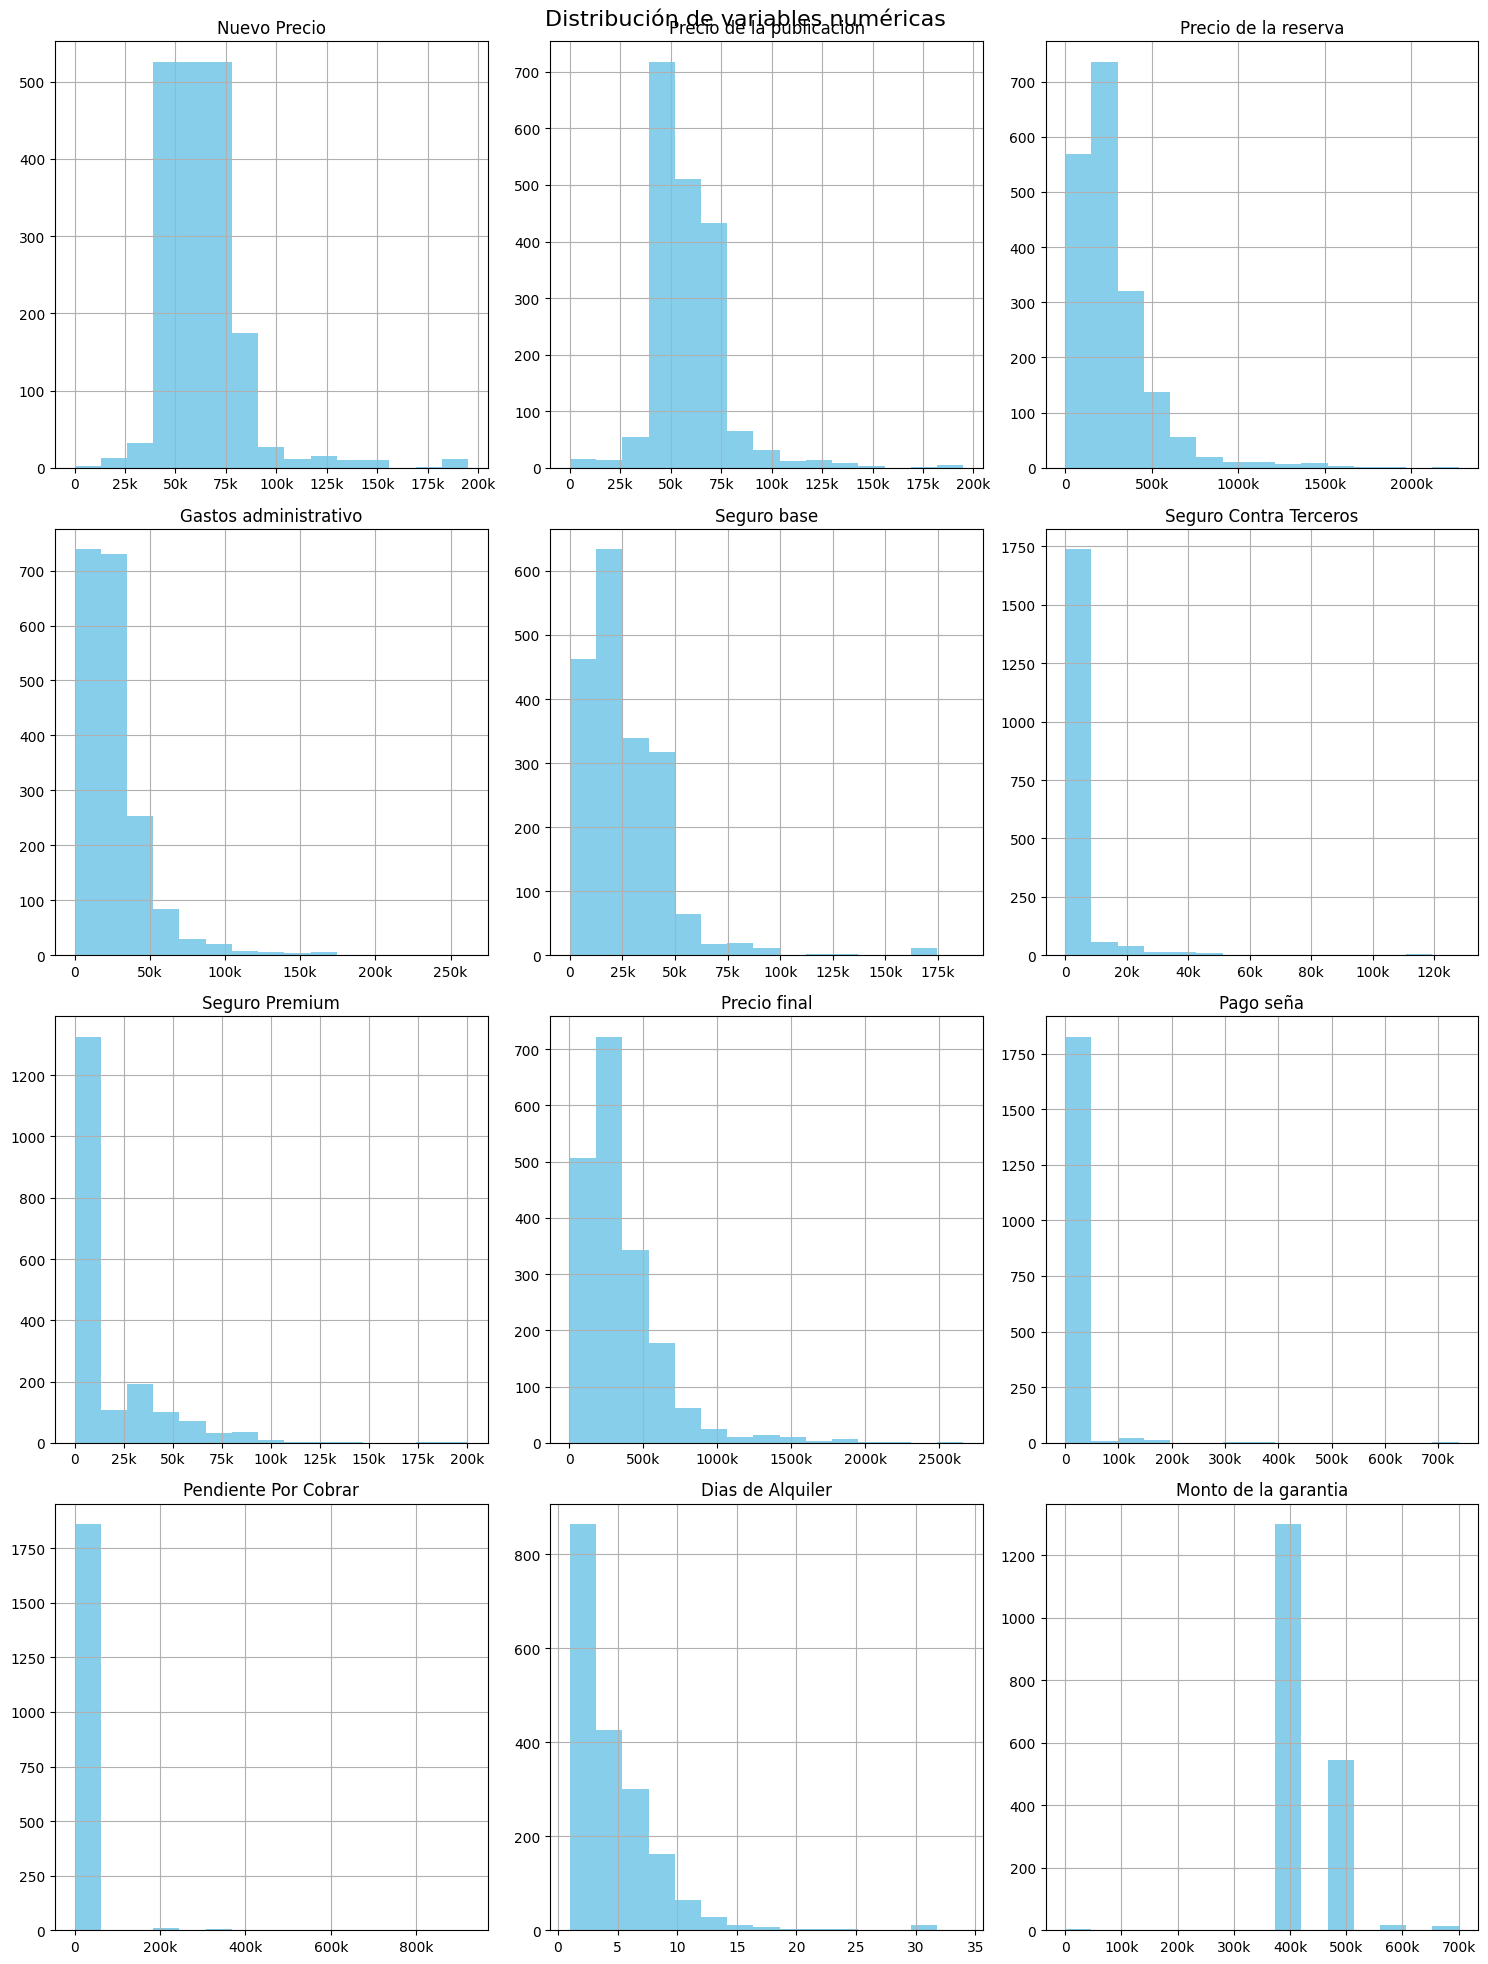

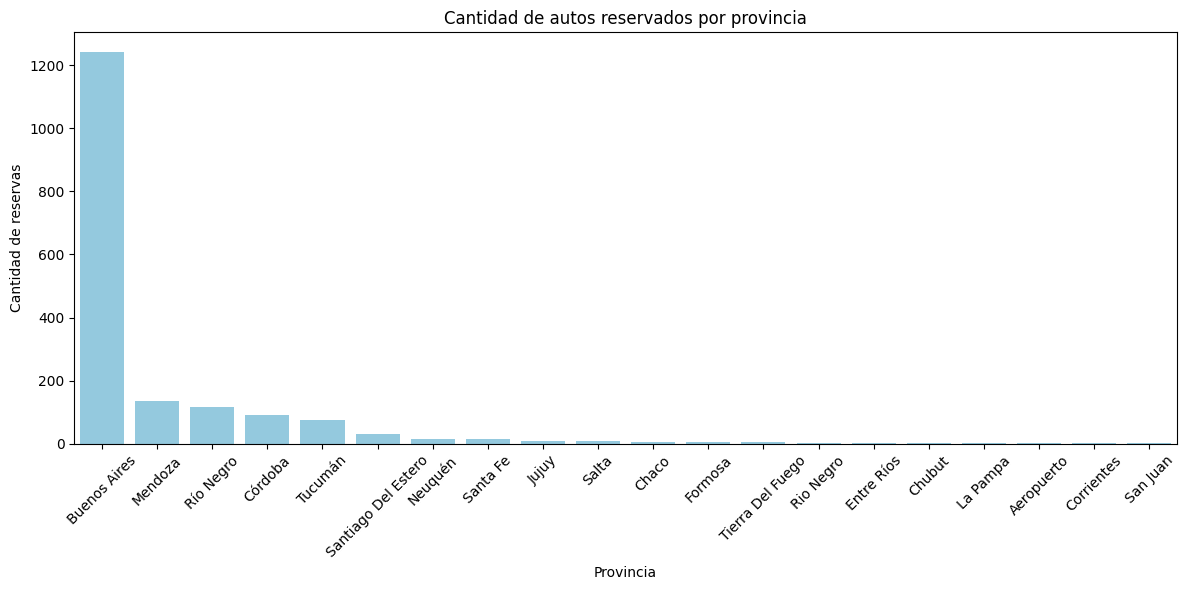

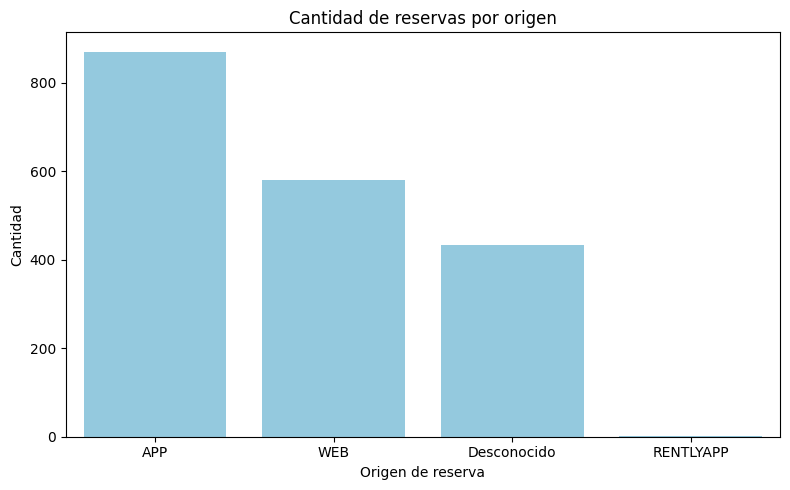

In [ ]:
# Distribuciones de variables
df_filtered = pd.read_csv('dataset/Reservas_limpio.csv', sep=';')

numeric_columns = df_filtered.select_dtypes(include='number').columns

n = len(numeric_columns)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    df_filtered[column].hist(bins=15, ax=axes[i], color='skyblue')
    axes[i].set_title(column)
    axes[i].xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k' if x >= 1000 else int(x))
    )
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribución de variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_provincias.index, y=conteo_provincias.values, color='skyblue')
plt.xticks(rotation=45)
plt.title("Cantidad de autos reservados por provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de reservas")
plt.tight_layout()
plt.show()

df_filtered['Origen'] = df_filtered['Origen'].fillna('Desconocido')
df_filtered['Origen'] = df_filtered['Origen'].replace('', 'Desconocido')
conteo_origen = df_filtered['Origen'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=conteo_origen.index, y=conteo_origen.values, color='skyblue')
plt.title('Cantidad de reservas por origen')
plt.xlabel('Origen de reserva')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

#### 🧊 Detección de outliers con boxplots

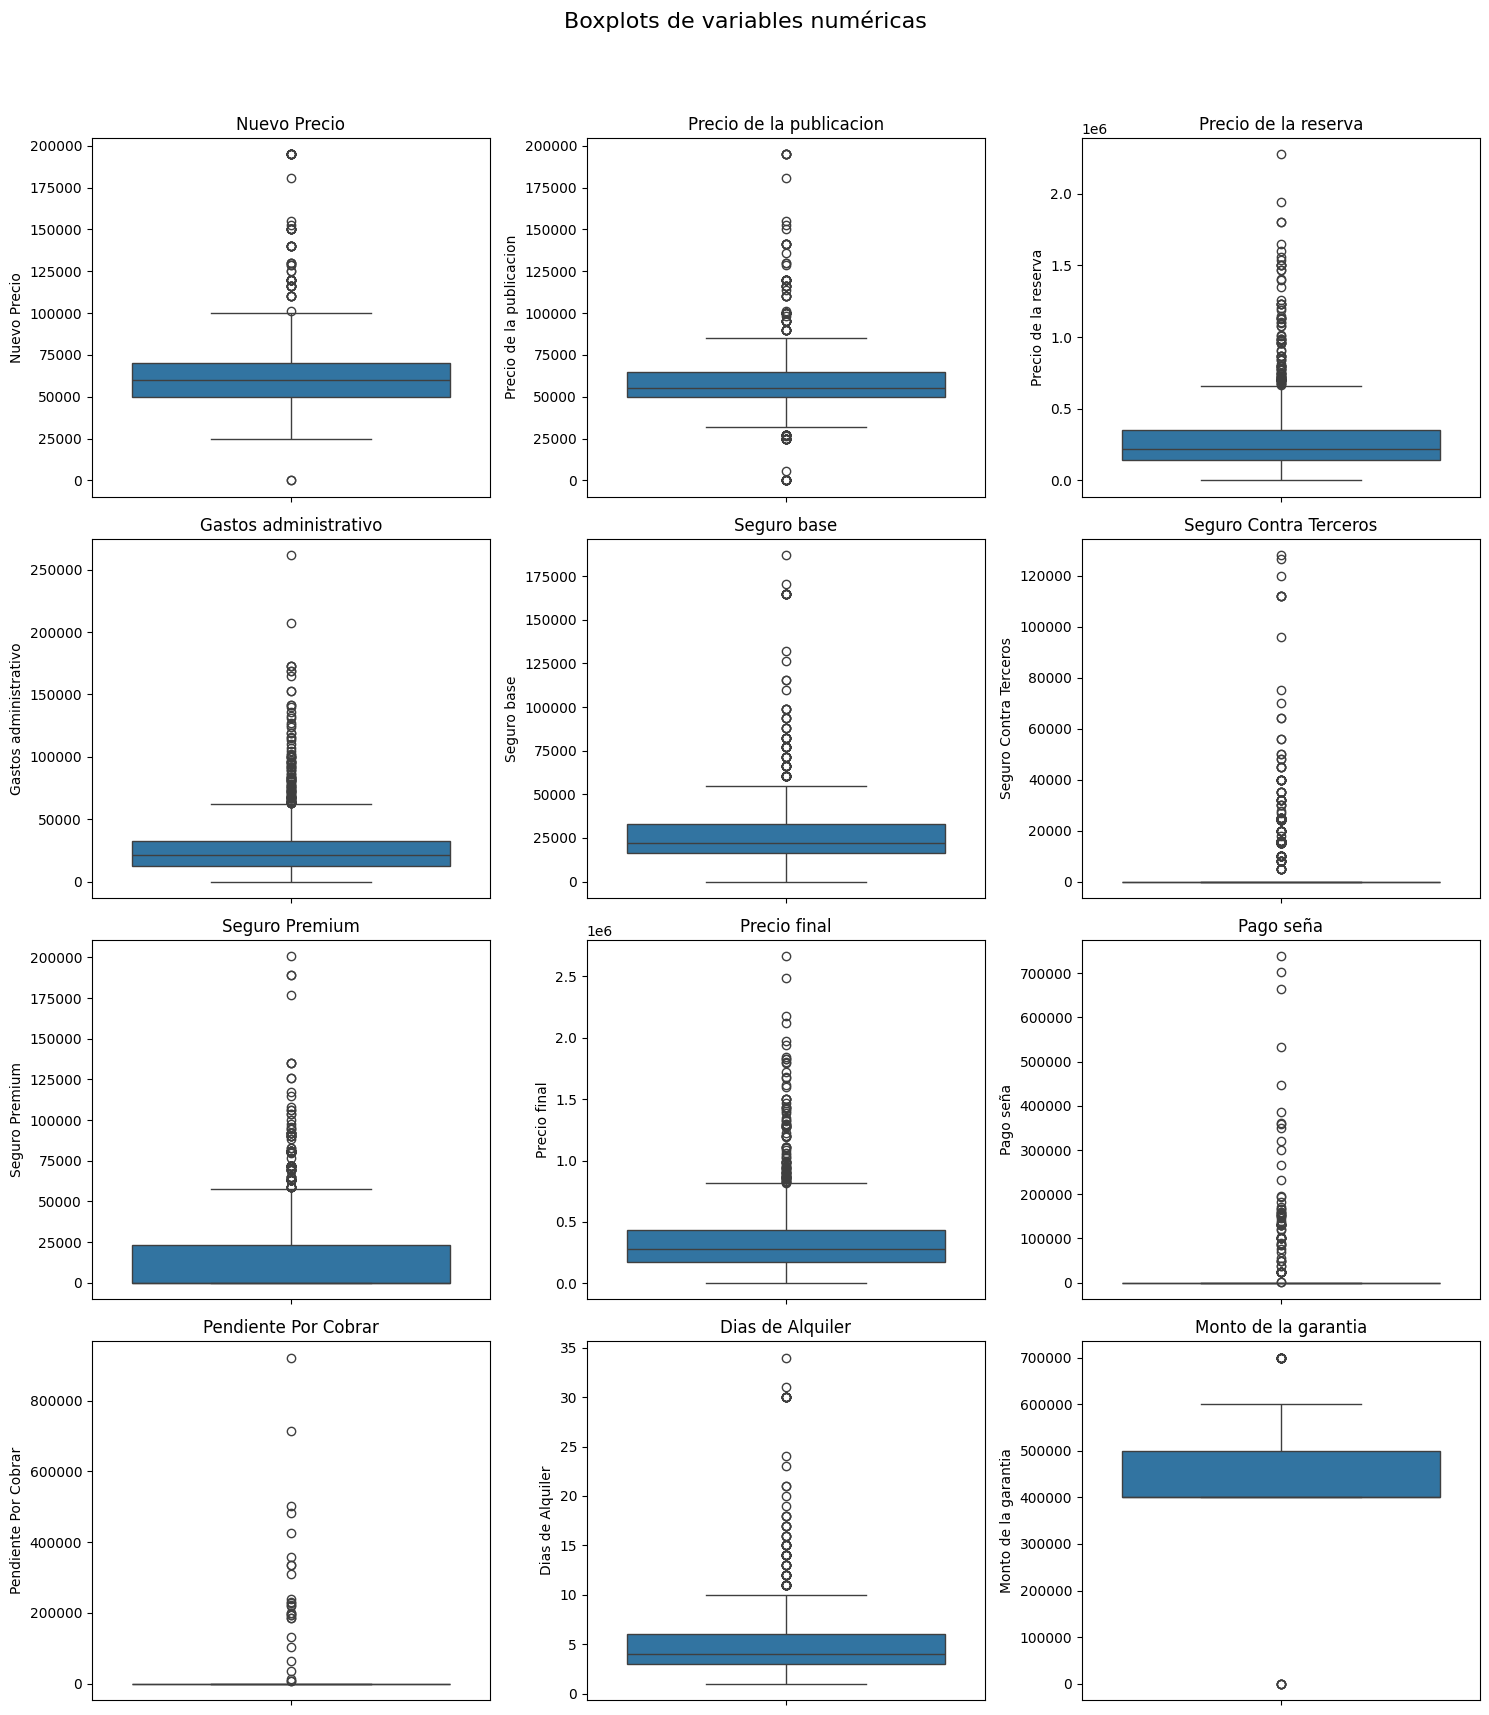

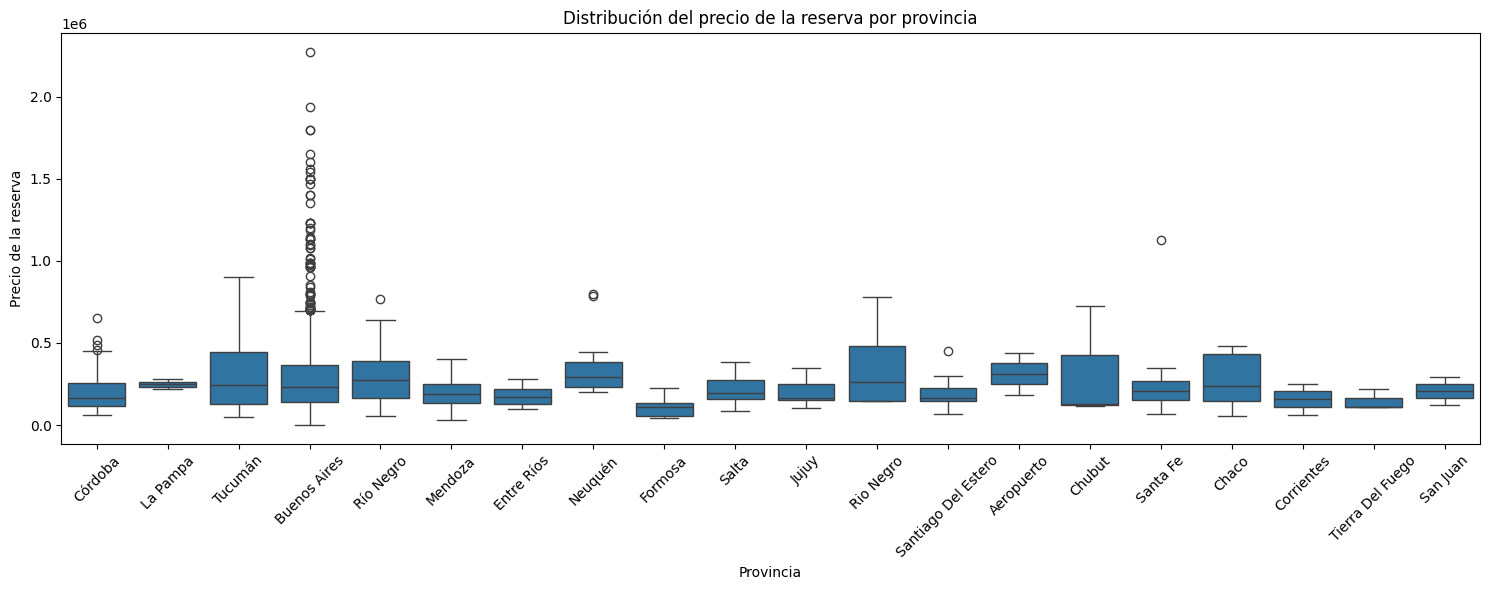

In [ ]:
# Boxplots verticales de las 12 variables numéricas (3 por fila)
fig, axes = plt.subplots(4, 3, figsize=(15, 18))

columnas = df_filtered.select_dtypes(include='number').columns

for i, ax in enumerate(axes.flat):
    sns.boxplot(y=df_filtered[columnas[i]], ax=ax)
    ax.set_title(columnas[i])

plt.suptitle('Boxplots de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15, 6))
sns.boxplot(x='Provincia', y='Precio de la reserva', data=df_filtered)
plt.xticks(rotation=45)
plt.title('Distribución del precio de la reserva por provincia')
plt.tight_layout()
plt.show()

#### 🔗 Matriz de correlación entre variables numéricas

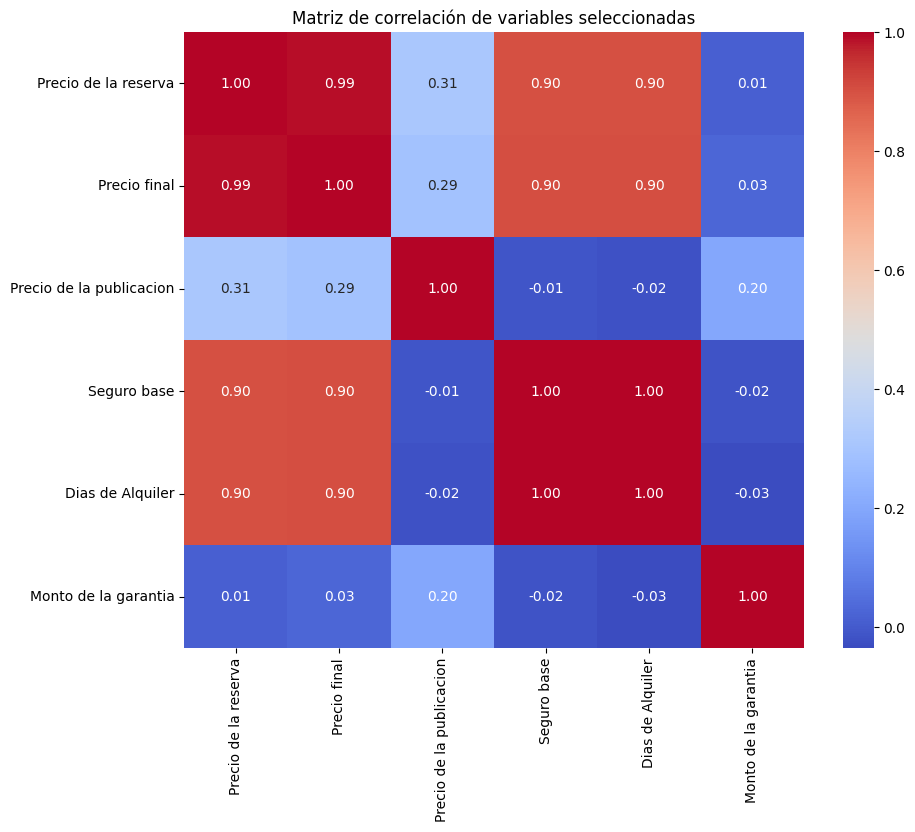

In [ ]:
numericas = df_filtered.select_dtypes(include='number')
variancia = numericas.var()
columnas_validas = variancia[variancia > 0].index

columnas_correlacion = [
    'Precio de la reserva',
    'Precio final',
    'Precio de la publicacion',
    'Seguro base',
    'Seguro Contra Tercero',
    'Dias de Alquiler',
    'Monto de la garantia'
]

columnas_correlacion = [col for col in columnas_correlacion if col in numericas.columns]

plt.figure(figsize=(10, 8))
sns.heatmap(numericas[columnas_correlacion].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables seleccionadas")
plt.show()

#### 📊 Relación entre variables: ejemplo alcohol vs quality

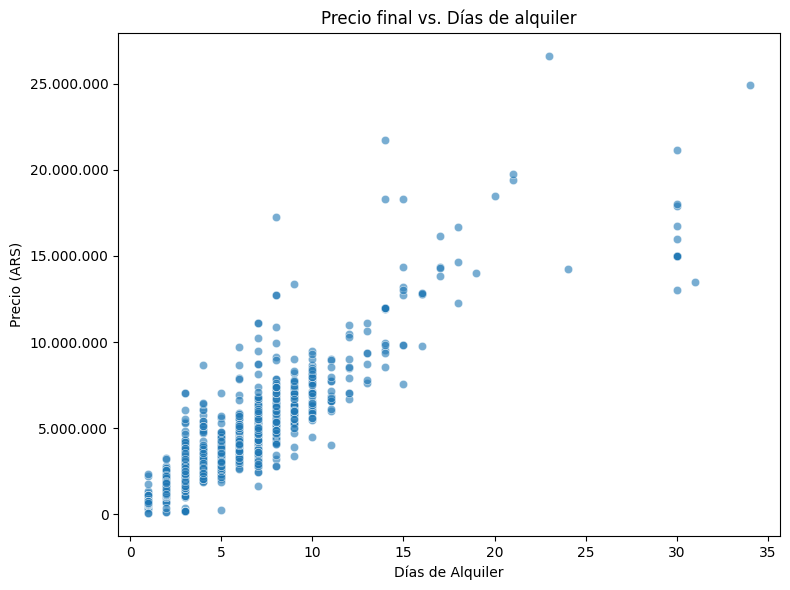

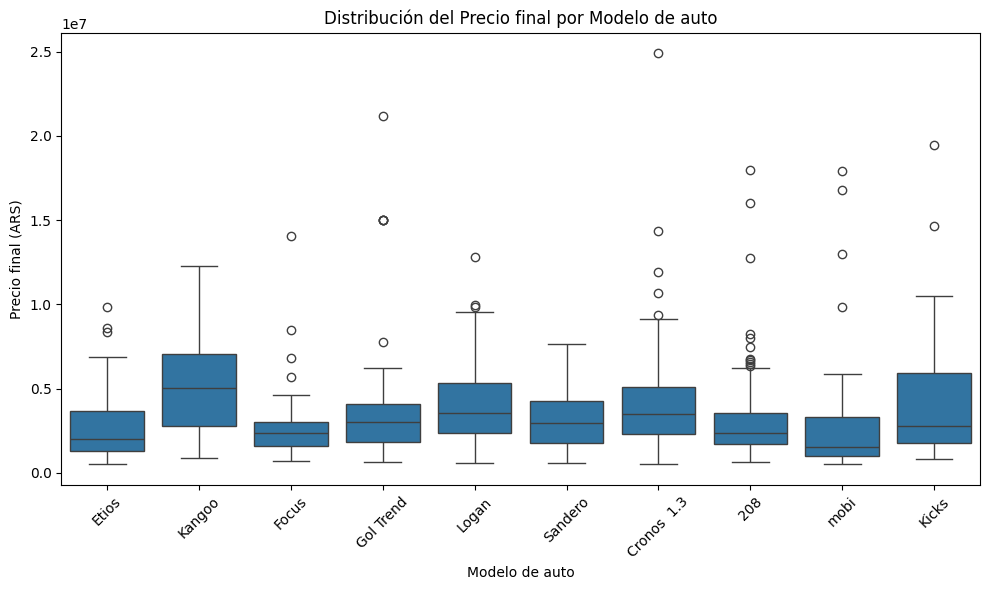

In [ ]:
#sns.boxplot(x='quality', y='alcohol', data=df)
#plt.title('Distribución del alcohol según calidad del vino')
#plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_filtered,
    x='Dias de Alquiler',
    y='Precio final',
    alpha=0.6
)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))
plt.title('Precio final vs. Días de alquiler')
plt.xlabel('Días de Alquiler')
plt.ylabel('Precio (ARS)')
plt.tight_layout()
plt.show()



top_modelos = df_filtered['Modelo'].value_counts().nlargest(10).index
df_modelos = df_filtered[df_filtered['Modelo'].isin(top_modelos)]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_modelos,
    x='Modelo',
    y='Precio final'
)
plt.xticks(rotation=45)
plt.title('Distribución del Precio final por Modelo de auto')
plt.ylabel('Precio final (ARS)')
plt.xlabel('Modelo de auto')
plt.tight_layout()
plt.show()

### 🧼 4. Diagnóstico de calidad de datos
- No se detectaron valores faltantes.
- Algunas variables muestran asimetrías (ej: `residual sugar`, `chlorides`).
- Existen valores atípicos en varias variables.
- Se observa una posible relación positiva entre alcohol y calidad.

### 🧪 5. Transformaciones realizadas

In [ ]:
# Crear variable categórica basada en calidad
df['quality_label'] = df['quality'].apply(lambda x: 'low' if x <= 4 else 'medium' if x <= 6 else 'high')
df['quality_label'] = pd.Categorical(df['quality_label'], categories=['low', 'medium', 'high'])

In [ ]:
# Normalización de variables numéricas (excepto quality)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include='number').columns.drop('quality')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,medium
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,medium
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,medium
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,medium
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,medium


### ✍️ 6. Reflexión final

Completar
